In [28]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import utils as utils

In [29]:
primeLabel = "ildarTest2"
planningRange = 20

In [30]:
localPathesLength = []
localPathesRequests = []
localPathesDuration = []
localPathesPositionsData = []
weightMaps = []
weightMapsData = []
pathesGlobal = []
pathesGlobalData = []

for i in range(planningRange):
    label = primeLabel + str(i)
    status, positions, rotations, localDuration, replaningRequests = utils.LoadLocalPlan(label)
    if status:
        localPathesLength.append(len(positions))
        localPathesDuration.append(localDuration/1000)
        localPathesRequests.append(replaningRequests - 1)
        positions = np.array(positions)
        rotations = np.array(rotations)

        x, y, z = positions[:, 0], positions[:, 2], positions[:, 1]
        localPositionsData = go.Scatter3d(
            x=x, y=y, z=z,
            mode='markers',
            name="Path, iteration " + str(i),
            marker=dict(
                size=1,
                color=i/planningRange,                # set color to an array/list of desired values
                colorscale='Viridis',   # choose a colorscale
                opacity=0.8 ))

        x, y, z = rotations[:, 0], rotations[:, 2], rotations[:, 1]
        localRotationsData = go.Scatter3d(
            x=x, y=y, z=z,
            mode='markers',
            marker=dict(
                size=2.5,
                # color=z,                # set color to an array/list of desired values
                colorscale='Viridis',   # choose a colorscale
                opacity=0.8 ))

        localPathesPositionsData.append(localPositionsData)


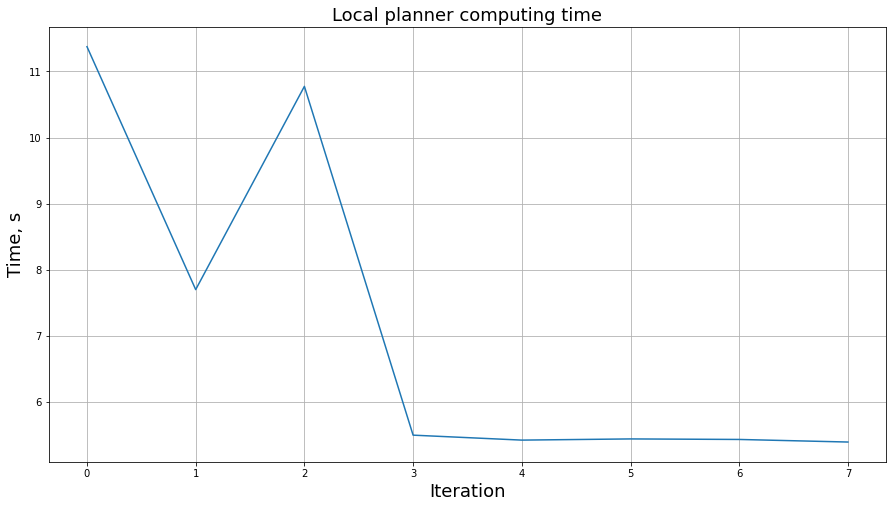

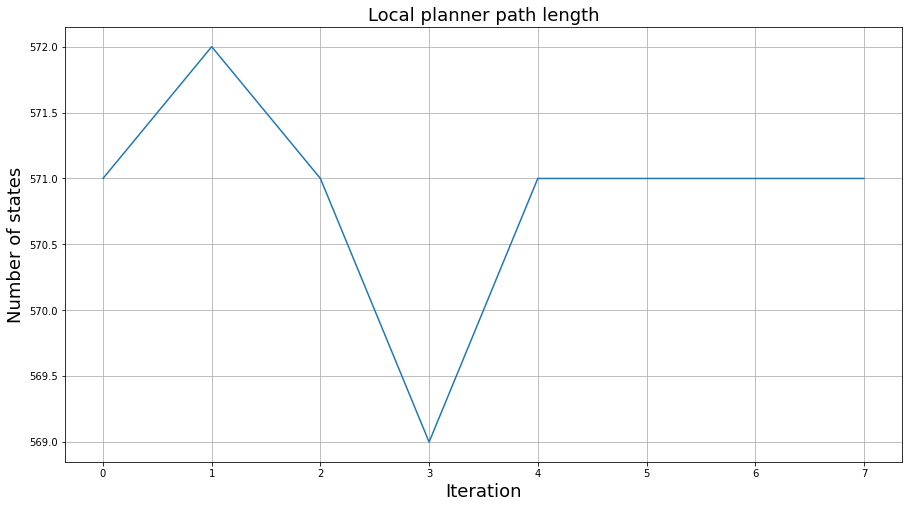

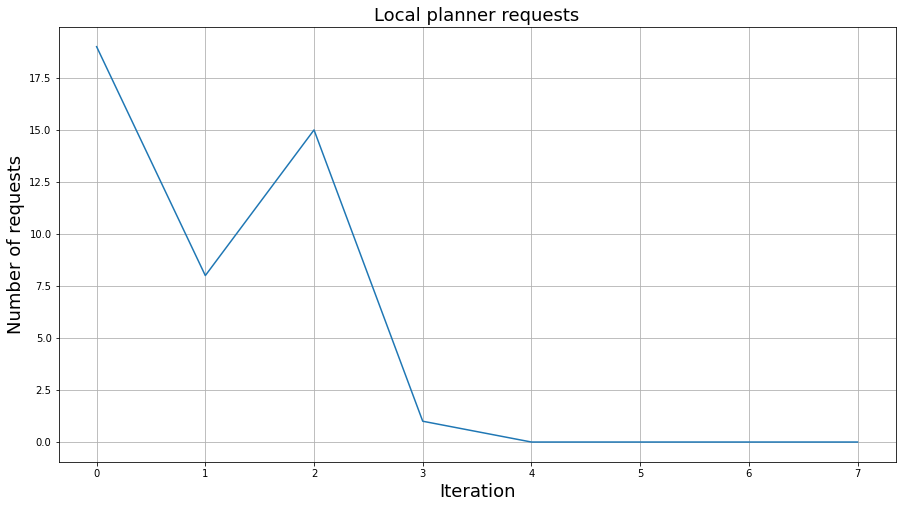

In [31]:
plt.figure(figsize=(15, 8))
plt.title("Local planner computing time", fontsize=18)
plt.plot(localPathesDuration)
plt.ylabel("Time, s", fontsize=18)
plt.xlabel("Iteration", fontsize=18)
plt.grid()
plt.show()

plt.figure(figsize=(15, 8))
plt.title("Local planner path length", fontsize=18)
plt.plot(localPathesLength)
plt.ylabel("Number of states", fontsize=18)
plt.xlabel("Iteration", fontsize=18)
plt.grid()
plt.show()

plt.figure(figsize=(15, 8))
plt.title("Local planner requests", fontsize=18)
plt.plot(localPathesRequests)
plt.ylabel("Number of requests", fontsize=18)
plt.xlabel("Iteration", fontsize=18)
plt.grid()
plt.show()

fig = go.Figure(data=localPathesPositionsData)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()


In [32]:
weightMaps = []
weightMapsData = []
pathesGlobal = []
pathesGlobalData = []

status, discreteMap = utils.LoadVoxelMap()
if status:
    x, z, y = discreteMap.nonzero()
    discreteMapData = go.Scatter3d(
        x=x, y=y, z=z,
        mode='markers',
        marker=dict(
            size=2,
            # color=z,                # set color to an array/list of desired values
            colorscale='Viridis',   # choose a colorscale
            opacity=0.8 ))

for planingCount in range(planningRange):
    label = primeLabel + str(planingCount) + "_" + str(localPathesRequests[planingCount] - 1)
    statusWeight, weightMap = utils.LoadWeightPlan(label)

    if statusWeight:
        # Process weight map
        x, z, y = weightMap.nonzero()
        weightMapData = go.Scatter3d(
            x=x, y=y, z=z,
            mode='markers',
            marker=dict(
                size=5,
                color= weightMap[x, z, y],                # set color to an array/list of desired values
                colorscale='Viridis',   # choose a colorscale
                opacity=0.8 ))
        weightMaps.append(weightMap)
        weightMapsData.append(weightMapData)

No such file: D:/catkin_ws/src/VRPP_ROS/launch/ildarTest24_-1_weight.txt


UnboundLocalError: local variable 'mapArray' referenced before assignment

In [ ]:
data = weightMapsData
data.append(discreteMapData)
fig = go.Figure(data=data)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [ ]:
weightMaps = []
weightMapsData = []
pathesGlobal = []
pathesGlobalData = []

for i in range(replaningRequests):
    label = primeLabel + "_" + str(i)
    statusWeight, weightMap = utils.LoadWeightPlan(label)
    statusGlobal, pathGlobal, durationGlobal = utils.LoadGlobalPlan(label)

    if statusWeight and statusGlobal:
        # Process weight map
        x, z, y = weightMap.nonzero()
        weightMapData = go.Scatter3d(
            x=x, y=y, z=z,
            mode='markers',
            marker=dict(
                size=3,
                color=weightMap[x, z, y],                # set color to an array/list of desired values
                colorscale='Viridis',   # choose a colorscale
                opacity=0.8 ))
        weightMaps.append(weightMap)
        weightMapsData.append(weightMapData)

        # Process global plan
        pathGlobal = np.array(pathGlobal)
        xPoses = pathGlobal[:, 0]
        yPoses = pathGlobal[:, 2]
        zPoses = pathGlobal[:, 1]
        pathGlobalData = go.Scatter3d(
            x=xPoses, y=yPoses, z=zPoses,
            mode='markers',
            marker=dict(
                size=2,
                # color=z,                # set color to an array/list of desired values
                colorscale='Viridis',   # choose a colorscale
                opacity=0.8 ))
        pathesGlobal.append(pathGlobal)
        pathesGlobalData.append(pathGlobalData)

print("weightMapsData:", len(weightMapsData))
print("pathesGlobalData:", len(pathesGlobalData))

No such file: D:/catkin_ws/src/VRPP_ROS/launch/ildarTest2_0_weight.txt


UnboundLocalError: local variable 'mapArray' referenced before assignment

In [ ]:
i = 0
fig = go.Figure(data=[discreteMapData, pathesGlobalData[i], weightMapsData[i]])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [ ]:
np.sum(localPathesDuration)/1000/60